## CNN

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


### Initialising the CNN

In [2]:
# Initialising the CNN
classifier = Sequential()

###  Step 1 - Convolution

Arguments:

    filters: Integer, the dimensionality of the output space
        (i.e. the number of output filters in the convolution).
        
    kernel_size: An integer or tuple/list of 2 integers, specifying the
        width and height of the 2D convolution window.
        Can be a single integer to specify the same value for
        all spatial dimensions.
        
    strides: An integer or tuple/list of 2 integers,
        specifying the strides of the convolution along the width and height.
        Can be a single integer to specify the same value for
        all spatial dimensions.
        Specifying any stride value != 1 is incompatible with specifying
        any `dilation_rate` value != 1.
        
    padding: one of `"valid"` or `"same"` (case-insensitive).
    
    data_format: A string,
        one of `channels_last` (default) or `channels_first`.
        The ordering of the dimensions in the inputs.
        `channels_last` corresponds to inputs with shape
        `(batch, height, width, channels)` while `channels_first`
        corresponds to inputs with shape
        `(batch, channels, height, width)`.
        It defaults to the `image_data_format` value found in your
        Keras config file at `~/.keras/keras.json`.
        If you never set it, then it will be "channels_last".
        
    dilation_rate: an integer or tuple/list of 2 integers, specifying
        the dilation rate to use for dilated convolution.
        Can be a single integer to specify the same value for
        all spatial dimensions.
        Currently, specifying any `dilation_rate` value != 1 is
        incompatible with specifying any stride value != 1.
        
    activation: Activation function to use
        (see [activations](../activations.md)).
        If you don't specify anything, no activation is applied
        (ie. "linear" activation: `a(x) = x`).
        
    use_bias: Boolean, whether the layer uses a bias vector.
    
    kernel_initializer: Initializer for the `kernel` weights matrix
        (see [initializers](../initializers.md)).
        
    bias_initializer: Initializer for the bias vector
        (see [initializers](../initializers.md)).
        
    kernel_regularizer: Regularizer function applied to
        the `kernel` weights matrix
        (see [regularizer](../regularizers.md)).
        
    bias_regularizer: Regularizer function applied to the bias vector
        (see [regularizer](../regularizers.md)).
        
    activity_regularizer: Regularizer function applied to
        the output of the layer (its "activation").
        (see [regularizer](../regularizers.md)).
        
    kernel_constraint: Constraint function applied to the kernel matrix
        (see [constraints](../constraints.md)).
        
    bias_constraint: Constraint function applied to the bias vector
        (see [constraints](../constraints.md)).

#### Input shape
    4D tensor with shape:
    `(samples, channels, rows, cols)` if data_format='channels_first'
    or 4D tensor with shape:
    `(samples, rows, cols, channels)` if data_format='channels_last'.

#### Output shape
    4D tensor with shape:
    `(samples, filters, new_rows, new_cols)` if data_format='channels_first'
    or 4D tensor with shape:
    `(samples, new_rows, new_cols, filters)` if data_format='channels_last'.
    `rows` and `cols` values might have changed due to padding

In [3]:
# Step 1 - Convolution
classifier.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

### Step 2 - Pooling

Init signature: **MaxPooling2D**(pool_size=(2, 2), strides=None, padding='valid', data_format=None)


Arguments:

    pool_size: integer or tuple of 2 integers,
        factors by which to downscale (vertical, horizontal).
        (2, 2) will halve the input in both spatial dimension.
        If only one integer is specified, the same window length
        will be used for both dimensions.
        
    strides: Integer, tuple of 2 integers, or None.
        Strides values.
        If None, it will default to `pool_size`.
        
    padding: One of `"valid"` or `"same"` (case-insensitive).
    
    data_format: A string,
        one of `channels_last` (default) or `channels_first`.
        The ordering of the dimensions in the inputs.
        `channels_last` corresponds to inputs with shape
        `(batch, height, width, channels)` while `channels_first`
        corresponds to inputs with shape
        `(batch, channels, height, width)`.
        It defaults to the `image_data_format` value found in your
        Keras config file at `~/.keras/keras.json`.
        If you never set it, then it will be "channels_last".

In [4]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

### Adding a second convolutional layer

In [5]:
# Adding a second convolutional layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

### Step 3 - Flattening

In [6]:
# Step 3 - Flattening
classifier.add(Flatten())

### Step 4 - Full connection

In [7]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

### Compiling the CNN

In [8]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Visualizing the network

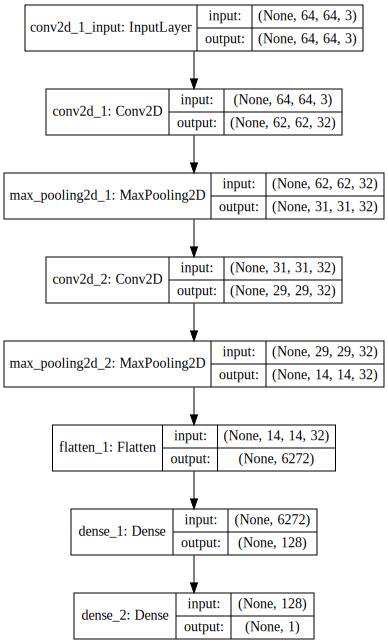

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(classifier,show_shapes=True).create(prog='dot', format='svg'))

In [10]:
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

## Pre-processing the images to fit the CNN

Look at keras preprocessing documentation.

**ImageDataGenerator** class augments the dataset with (random) sheared,zoomed,flipped images etc.

**Preprocess the image by rescaling** the pixel values to lie between 0 and 1. This is done by dividing each pizel by 255

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
## Rescale the image and Augment training data with sheared, zoomed and flipped images. 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

## Just rescale the images of test set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('Convolutional_Neural_Networks/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('Convolutional_Neural_Networks/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [17]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000/32,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000/32)

Epoch 1/25
250/250 [==============================] - 17s 68ms/step - loss: 0.6383 - acc: 0.6244 - val_loss: 0.5653 - val_acc: 0.7135
Epoch 2/25
250/250 [==============================] - 16s 64ms/step - loss: 0.5791 - acc: 0.6951 - val_loss: 0.5469 - val_acc: 0.7190
Epoch 3/25
250/250 [==============================] - 16s 64ms/step - loss: 0.5452 - acc: 0.7256 - val_loss: 0.5294 - val_acc: 0.7370
Epoch 4/25
250/250 [==============================] - 16s 64ms/step - loss: 0.5109 - acc: 0.7445 - val_loss: 0.4961 - val_acc: 0.7580
Epoch 5/25
250/250 [==============================] - 16s 66ms/step - loss: 0.4917 - acc: 0.7603 - val_loss: 0.5263 - val_acc: 0.7525
Epoch 6/25
250/250 [==============================] - 16s 65ms/step - loss: 0.4803 - acc: 0.7612 - val_loss: 0.4930 - val_acc: 0.7690
Epoch 7/25
250/250 [==============================] - 16s 65ms/step - loss: 0.4641 - acc: 0.7742 - val_loss: 0.5187 - val_acc: 0.7600
Epoch 8/25
250/250 [==============================] - 16s 65ms

### Evaluate model

In [18]:
classifier.evaluate_generator(test_set)

[0.5071521894931793, 0.803]

### Save the model

In [19]:
import h5py

# serialize model to JSON
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
